<a href="https://colab.research.google.com/github/Angel-Shaha/YouTube-Comment-Analyser/blob/main/Spam_Detection_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
raw_yt_data = pd.read_csv('/content/ytkagglecombined.csv')

In [ ]:
print(raw_yt_data)

                                                 CONTENT  CLASS
0      - do you know what trade is?<br>- it&#39;s whe...      0
1                                  I hate this song! ï»¿      0
2                                  I love your music ï»¿      0
3       Something to dance to, even if your sad JUST ...      0
4      !! Thank you! Nice summary! Let&#39;s go for t...      0
...                                                  ...    ...
15207  Hey guys!<br>I hope you all have an amazing da...      1
15208  Hey guys!<br>I hope you all have an amazing da...      1
15209  Hey guys!<br>I hope you all have an amazing da...      1
15210  Hey guys!<br>I hope you all have an amazing da...      1
15211  Hey guys!<br>I hope you all have an amazing da...      1

[15212 rows x 2 columns]


In [ ]:
#replace the null values with a null string
yt_data = raw_yt_data.where((pd.notnull(raw_yt_data)),'')

In [ ]:
yt_data.head()

,CONTENT,CLASS
0,- do you know what trade is?<br>- it&#39;s whe...,0
1,I hate this song! ï»¿,0
2,I love your music ï»¿,0
3,"Something to dance to, even if your sad JUST ...",0
4,!! Thank you! Nice summary! Let&#39;s go for t...,0


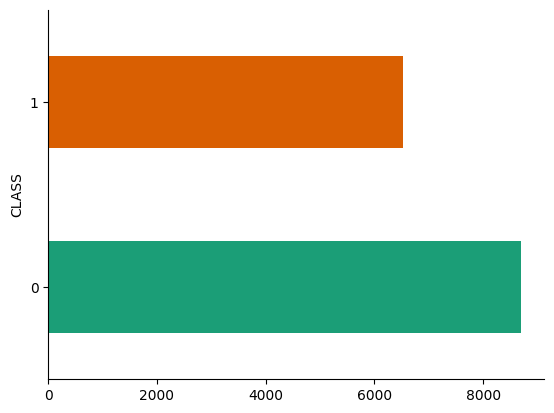

In [ ]:
# @title CLASS

from matplotlib import pyplot as plt
import seaborn as sns
yt_data.groupby('CLASS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
yt_data.shape

(15212, 2)

In [ ]:
yt_data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [ ]:
port_stem= PorterStemmer()

In [ ]:
def stemming(content):
  cleanr = re.compile('<.*?>') #html tags removed
  cleantext = re.sub(cleanr, '', content)
  stemmed_content=re.sub('[^a-zA-Z]',' ',cleantext) #^to remove the words which are not letters
  stemmed_content=stemmed_content.lower() #convert all to lowercase
  stemmed_content=stemmed_content.split() #splitting and storing in a list
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] #if word does not belong to stem words then process the stemmed content
  stemmed_content=' '.join(stemmed_content) #joining all tweets

  return stemmed_content

In [ ]:
yt_data['stemmed_content']= yt_data['CONTENT'].apply(stemming)

In [ ]:
yt_data.head()

,CONTENT,CLASS,stemmed_content
0,- do you know what trade is?<br>- it&#39;s whe...,0,know trade give want right dogecoin peopl took...
1,I hate this song! ï»¿,0,hate song
2,I love your music ï»¿,0,love music
3,"Something to dance to, even if your sad JUST ...",0,someth danc even sad danc psi gangnam style v ...
4,!! Thank you! Nice summary! Let&#39;s go for t...,0,thank nice summari let go invest bitcoin lot s...


In [ ]:
# separating the data as texts and label

X = yt_data['stemmed_content']

Y = yt_data['CLASS']

In [ ]:
print(X)

0        know trade give want right dogecoin peopl took...
1                                                hate song
2                                               love music
3        someth danc even sad danc psi gangnam style v ...
4        thank nice summari let go invest bitcoin lot s...
                               ...                        
15207    hey guy hope amaz day amp want say subscrib aw...
15208    hey guy hope amaz day amp want say subscrib aw...
15209    hey guy hope amaz day amp want say subscrib aw...
15210    hey guy hope amaz day amp want say subscrib aw...
15211    hey guy hope amaz day amp want say subscrib aw...
Name: stemmed_content, Length: 15212, dtype: object


In [ ]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
15207    1
15208    1
15209    1
15210    1
15211    1
Name: CLASS, Length: 15212, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(15212,)
(13690,)
(1522,)


In [ ]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [ ]:
print(X_train)

  (0, 2053)	0.1827418654439749
  (0, 2330)	0.19502875482957577
  (0, 2491)	0.21532300378465546
  (0, 7137)	0.14047453536733492
  (0, 13847)	0.1813783432155467
  (0, 12331)	0.18702126582630568
  (0, 11829)	0.3809326180354779
  (0, 13271)	0.13770973089476113
  (0, 4462)	0.3257018900916668
  (0, 6232)	0.39829012417395065
  (0, 3563)	0.3702091620470211
  (0, 8287)	0.21033057042331518
  (0, 5211)	0.37559860610995505
  (0, 5489)	0.20841926009638342
  (1, 3981)	0.15819826433925482
  (1, 9373)	0.13755459554849725
  (1, 11964)	0.17677014106802025
  (1, 5710)	0.141026818934733
  (1, 13830)	0.11049693967195101
  (1, 12834)	0.17854777552206938
  (1, 1095)	0.18493678432332486
  (1, 10302)	0.15819826433925482
  (1, 12555)	0.15676495577034125
  (1, 3984)	0.11456333125471993
  (1, 9829)	0.16224736625613015
  :	:
  (13686, 11384)	0.2791691266835473
  (13686, 8829)	0.23989266671168902
  (13686, 2781)	0.24637857655607226
  (13686, 8364)	0.1808754474887198
  (13686, 9202)	0.17609839954919165
  (13686, 363

In [ ]:
print(X_test)

  (0, 12439)	0.4515578817951255
  (0, 5622)	0.5775891887089739
  (0, 5034)	0.498547662345896
  (0, 4344)	0.46253263327537364
  (1, 13600)	0.14580816150858641
  (1, 12581)	0.1543779892573694
  (1, 12578)	0.34201339635641936
  (1, 12349)	0.23398644215979944
  (1, 11755)	0.14181243315766112
  (1, 11214)	0.14978188953362287
  (1, 10118)	0.19380443019472665
  (1, 9750)	0.20169057681547561
  (1, 9700)	0.13005731124983919
  (1, 8602)	0.2686353200595841
  (1, 8170)	0.13092690941239937
  (1, 8133)	0.12284572433858787
  (1, 7308)	0.16497102844983685
  (1, 7305)	0.17582909392766505
  (1, 7137)	0.10193270625709798
  (1, 6827)	0.23889732498820992
  (1, 6170)	0.1857829693488982
  (1, 5443)	0.12119123866025049
  (1, 4766)	0.17913560510036763
  (1, 4228)	0.1564061701818356
  (1, 3407)	0.17202118612411588
  :	:
  (1519, 12326)	0.41119372195758735
  (1519, 11716)	0.4189193972662433
  (1519, 6106)	0.7245472422004638
  (1519, 4950)	0.3611890854337326
  (1520, 12257)	0.29873096441690805
  (1520, 11435)	0.1

In [ ]:
from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()

from sklearn.naive_bayes import MultinomialNB
#model = MultinomialNB()

from sklearn.svm import SVC
#model = SVC(kernel='linear')

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
# model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
# model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, random_state=42, n_iter_no_change=3, tol=0.01)

In [ ]:
# training the model with the training data
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
# prediction on training data

prediction_on_training_data = model.predict(X_train)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

# prediction on test data

prediction_on_test_data = model.predict(X_test)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

print('Accuracy on training data : ', accuracy_on_training_data)
print('Accuracy on test data : ', accuracy_on_test_data)

# Calculate precision
precision = precision_score(Y_test, prediction_on_test_data)
print(f"Precision on test data: {precision:.4f}")

# Calculate recall
recall = recall_score(Y_test, prediction_on_test_data)
print(f"Recall on test data: {recall:.4f}")

# Calculate F1-score
f1 = f1_score(Y_test, prediction_on_test_data)
print(f"F1-score on test data: {f1:.4f}")

from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)

# Convert to a pandas DataFrame for better visualization
conf_df = pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

print("Confusion Matrix Results:\n")
print(conf_df)

Accuracy on training data :  0.9846603360116873
Accuracy on test data :  0.8883048620236531
Precision on test data: 0.8993
Recall on test data: 0.8183
F1-score on test data: 0.8569
Confusion Matrix Results:

                 Predicted Negative  Predicted Positive
Actual Negative                 843                  57
Actual Positive                 113                 509


In [ ]:
input_mail = ["click on this link to get free money"]

# convert text to feature vectors
input_data_features = vectorizer.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail
